In [1]:
import context

from rateslib.fx import FXRates, FXForwards
from rateslib.dual import Dual
from rateslib.curves import Curve, LineCurve
from rateslib.instruments import FRA, IRS, SBS, Spread
from rateslib.solver import Solver
from rateslib.calendars import add_tenor
from datetime import datetime as dt
import pandas as pd

In [17]:
tenors = ["1w", "2w", "3w", "1m", "2m", "3m", "4m", "5m", "6m", "7m", "8m", "9m", "10m", "11m", "12m", "18m", "2Y", "3Y", "4Y"]
dates = [add_tenor(dt(2023, 8, 18), _, "F", "nyc") for _ in tenors]
dates_p = [add_tenor(_, "2b", None, "nyc") for _ in dates]
dates_p

[datetime.datetime(2023, 8, 29, 0, 0),
 datetime.datetime(2023, 9, 6, 0, 0),
 datetime.datetime(2023, 9, 12, 0, 0),
 datetime.datetime(2023, 9, 20, 0, 0),
 datetime.datetime(2023, 10, 20, 0, 0),
 datetime.datetime(2023, 11, 22, 0, 0),
 datetime.datetime(2023, 12, 20, 0, 0),
 datetime.datetime(2024, 1, 22, 0, 0),
 datetime.datetime(2024, 2, 22, 0, 0),
 datetime.datetime(2024, 3, 20, 0, 0),
 datetime.datetime(2024, 4, 22, 0, 0),
 datetime.datetime(2024, 5, 22, 0, 0),
 datetime.datetime(2024, 6, 21, 0, 0),
 datetime.datetime(2024, 7, 22, 0, 0),
 datetime.datetime(2024, 8, 21, 0, 0),
 datetime.datetime(2025, 2, 20, 0, 0),
 datetime.datetime(2025, 8, 20, 0, 0),
 datetime.datetime(2026, 8, 20, 0, 0),
 datetime.datetime(2027, 8, 20, 0, 0)]

In [21]:
sofr = dict(
    calendar="nyc",
    effective=dt(2023, 8, 18),
    frequency="A",
    curves="sofr"
)
instruments = [
    IRS(**sofr, termination=_) for _ in dates
]
curve = Curve({**{dt(2023, 8, 16): 1.0}, **{_ : 1.0 for _ in dates}}, calendar="nyc", id="sofr", interpolation="log_linear")

In [22]:
solver = Solver(curves=[curve], instruments=instruments, s=[
    5.30190,
    5.30470,
    5.30732,
    5.31038,
    5.33912,
    5.37200,
    5.40000,
    5.41712,
    5.42800,
    5.43218,
    5.42928,
    5.41930,
    5.40600,
    5.38300,
    5.35550,
    5.04775,
    4.79988,
    4.44106,
    4.22650,
])

SUCCESS: `func_tol` reached after 3 iterations (gauss_newton) , `f_val`: 3.81264830418605e-13, `time`: 0.0630s


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:>,
 [<matplotlib.lines.Line2D at 0x216d0ca3700>])

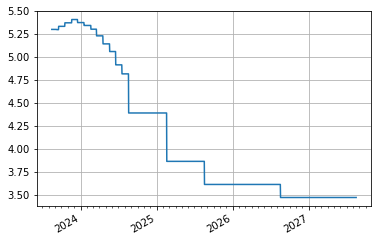

In [23]:
curve.plot("1b")

In [24]:
curve.nodes

{datetime.datetime(2023, 8, 16, 0, 0): <Dual: 1.000000, ('sofr0',), [1.]>,
 datetime.datetime(2023, 8, 25, 0, 0): <Dual: 0.998676, ('sofr1',), [1.]>,
 datetime.datetime(2023, 9, 1, 0, 0): <Dual: 0.997648, ('sofr2',), [1.]>,
 datetime.datetime(2023, 9, 8, 0, 0): <Dual: 0.996620, ('sofr3',), [1.]>,
 datetime.datetime(2023, 9, 18, 0, 0): <Dual: 0.995155, ('sofr4',), [1.]>,
 datetime.datetime(2023, 10, 18, 0, 0): <Dual: 0.990743, ('sofr5',), [1.]>,
 datetime.datetime(2023, 11, 20, 0, 0): <Dual: 0.985877, ('sofr6',), [1.]>,
 datetime.datetime(2023, 12, 18, 0, 0): <Dual: 0.981740, ('sofr7',), [1.]>,
 datetime.datetime(2024, 1, 18, 0, 0): <Dual: 0.977208, ('sofr8',), [1.]>,
 datetime.datetime(2024, 2, 20, 0, 0): <Dual: 0.972434, ('sofr9',), [1.]>,
 datetime.datetime(2024, 3, 18, 0, 0): <Dual: 0.968575, ('sofr10',), [1.]>,
 datetime.datetime(2024, 4, 18, 0, 0): <Dual: 0.964224, ('sofr11',), [1.]>,
 datetime.datetime(2024, 5, 20, 0, 0): <Dual: 0.959827, ('sofr12',), [1.]>,
 datetime.datetime(20

In [7]:
irs = IRS(dt(2023, 11, 18), dt(2025, 2, 18), "A", calendar="nyc", curves="sofr", fixed_rate=5.40, notional=-100e6)
irs.npv(solver=solver)

<Dual: 518,773.688581, ('sofr10', 'sofr15', 'sofr16', 'sofr17', 'sofr5', 'sofr6', 'sofr8', 'sofr9'), [-1.77480824e+02  0.00000000e+00  1.05431153e+08  6.33301873e+03
  0.00000000e+00 -9.99705518e+07  0.00000000e+00  1.37178580e+06]>

In [8]:
irs.rate(solver=solver)

<Dual: 4.962426, ('sofr10', 'sofr15', 'sofr16', 'sofr17', 'sofr5', 'sofr6', 'sofr8', 'sofr9'), [ 7.16225261e-03  0.00000000e+00 -8.85598921e+01 -1.13818052e-03
  0.00000000e+00  8.43229765e+01  0.00000000e+00 -1.06976230e+00]>

In [9]:
irs.delta(solver=solver).sum()

local_ccy  display_ccy
usd        usd           -11845.085955
dtype: float64

In [10]:
irs.gamma(solver=solver).sum().sum()

3.14953984444117

In [11]:
irs.analytic_delta(curve)

<Dual: -11,855.671614, ('sofr10', 'sofr16', 'sofr17', 'sofr9'), [ -189.99861711 -9997.23990164  -113.89219131 -2365.55832552]>

In [12]:
irs.cashflows(solver=solver)

Type   Period  Ccy  Acc Start    Acc End    Payment Convention  \
leg1 0  FixedPeriod     Stub  USD 2023-11-20 2024-02-20 2024-02-22     ACT360   
     1  FixedPeriod  Regular  USD 2024-02-20 2025-02-18 2025-02-20     ACT360   
leg2 0  FloatPeriod     Stub  USD 2023-11-20 2024-02-20 2024-02-22     ACT360   
     1  FloatPeriod  Regular  USD 2024-02-20 2025-02-18 2025-02-20     ACT360   

             DCF     Notional        DF Collateral      Rate Spread  \
leg1 0  0.255556 -100000000.0  0.972148       None  5.400000   None   
     1  1.011111 -100000000.0  0.926831       None  5.400000   None   
leg2 0  0.255556  100000000.0  0.972148       None  5.409341    0.0   
     1  1.011111  100000000.0  0.926831       None  4.843946    0.0   

            Cashflow           NPV  FX Rate       NPV Ccy  
leg1 0  1.380000e+06  1.341564e+06      1.0  1.341564e+06  
     1  5.460000e+06  5.060499e+06      1.0  5.060499e+06  
leg2 0 -1.382387e+06 -1.343885e+06      1.0 -1.343885e+06  
     1 -4.897768e+06 -4.539404e+06      1.0 -4.539404e+06

In [16]:
from rateslib.scheduling import Schedule
sch = Schedule(
    effective="9Y",
    termination="1Y",
    frequency="s",
    eom=True,
    eval_date=dt(2024, 2, 26),
    eval_mode="swaptions_align",
    calendar="bus"
)
sch

freq: S,  stub: SHORTFRONT,  roll: eom,  pay lag: 2,  modifier: MF
    Period Unadj Acc Start Unadj Acc End  Acc Start    Acc End    Payment
0  Regular      2033-02-28    2033-08-31 2033-02-28 2033-08-31 2033-09-02
1  Regular      2033-08-31    2034-02-28 2033-08-31 2034-02-28 2034-03-02